In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas
import scipy.stats as st
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import linregress
from scipy import stats
import holoviews as hv

In [3]:
# Take in all of our world energy data and read it into pandas

world_energy_df = pd.read_csv("Resources/world_energy_consumption.csv")
world_energy_df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [4]:
world_energy_df.columns.tolist()

['country',
 'year',
 'iso_code',
 'population',
 'gdp',
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'electricity_demand',
 'electricity_generation',
 'electricity_share_energy',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_elec_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 

In [5]:
pd.set_option("display.max_columns", None)
world_energy_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Data columns (total 129 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    country                                       object 
 1    year                                          int64  
 2    iso_code                                      object 
 3    population                                    float64
 4    gdp                                           float64
 5    biofuel_cons_change_pct                       float64
 6    biofuel_cons_change_twh                       float64
 7    biofuel_cons_per_capita                       float64
 8    biofuel_consumption                           float64
 9    biofuel_elec_per_capita                       float64
 10   biofuel_electricity                           float64
 11   biofuel_share_elec                            float64
 12   biofuel_share_energy                        

In [6]:
#See how our data looks for unavailable cells
combined_conditions = world_energy_df[
                    world_energy_df.isna().any(axis=1) | (world_energy_df == '').any(axis=1) | (world_energy_df == 0).any(axis=1)]
combined_conditions

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.60,1.519,NaN,500.231,NaN,NaN,NaN,NaN,NaN,71.03,NaN,NaN,NaN,NaN,19.268,NaN,368.65,368.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.75,NaN,NaN,80.225,NaN,NaN,NaN,NaN,NaN,163.22,NaN,NaN,NaN,NaN,NaN,44.275,NaN,184.41,NaN,NaN,NaN,NaN,50.37,NaN,13.663,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,61.50,NaN,NaN,NaN,NaN,NaN,16.682,NaN,NaN,22.53,16.93,NaN,NaN,NaN,NaN,NaN,6.111,4.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,1.516,NaN,499.358,NaN,NaN,NaN,NaN,NaN,80.02,NaN,NaN,NaN,NaN,20.147,NaN,397.19,397.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.51,NaN,NaN,80.694,NaN,NaN,NaN,NaN,NaN,185.35,NaN,NaN,NaN,NaN,NaN,46.665,NaN,198.34,NaN,NaN,NaN,NaN,54.26,NaN,13.661,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,55.14,NaN,NaN,NaN,NaN,NaN,13.883,NaN,NaN,22.42,16.40,NaN,NaN,NaN,NaN,NaN,5.645,4.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,

In [7]:
world_energy_df=world_energy_df.fillna(0)

In [8]:
world_energy_df['non_renewables_consumption'] = (
    world_energy_df['coal_consumption'] + world_energy_df['gas_consumption']+ world_energy_df['oil_consumption'] + world_energy_df['nuclear_consumption']
)
world_energy_df['Total Energy Consumption'] = (
    world_energy_df['renewables_consumption'] + world_energy_df['non_renewables_consumption'] 
)


In [9]:
world_energy_df['non_renewables_production'] = (
    world_energy_df['coal_electricity'] + world_energy_df['coal_production'] + world_energy_df['gas_production'] +
    world_energy_df['gas_electricity'] + world_energy_df['nuclear_electricity'] + world_energy_df['oil_electricity'] + world_energy_df['oil_production']
)

world_energy_df['Total Energy Production'] = (
    world_energy_df['renewables_electricity'] + world_energy_df['non_renewables_production'] 
)

world_energy_df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production
0,ASEAN (Ember),2000,0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,5.60,1.519,0.0,500.231,0.0,0.0,0.0,0.0,0.000,71.03,0.000,0.000,0.000,0.000,19.268,0.0,368.65,368.65,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,295.75,0.0,0.0,80.225,0.0,0.0,0.0,0.0,0.0,163.22,0.0,0.0,0.0,0.0,0.0,44.275,0.0,184.41,0.0,0.0,0.0,0.000,50.37,0.0,13.663,0.0,0.0,0.0,0.0,0.000,72.90,0.0,19.775,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,61.50,0.0,0.0,0.0,0.0,0.0,16.682,0.0,0.0,22.53,16.93,0.0,0.0,0.000,0.0,0.0,6.111,4.592,0.0,0.000,0.000,0.0,0.0,0.0,0.000,72.90,0.0,19.775,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295.750,368.650
1,ASEAN (Ember),2001,0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,6.02,1.516,0.0,499.358,0.0,0.0,0.0,0.0,0.000,80.02,0.000,0.000,0.000,0.000,20.147,0.0,397.19,397.19,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,320.51,0.0,0.0,80.694,0.0,0.0,0.0,0.0,0.0,185.35,0.0,0.0,0.0,0.0,0.0,46.665,0.0,198.34,0.0,0.0,0.0,0.000,54.26,0.0,13.661,0.0,0.0,0.0,0.0,0.000,76.68,0.0,19.306,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,55.14,0.0,0.0,0.0,

In [10]:
# Create a new column for the non-renewable energy production, total_ per capita
world_energy_df['non-renewables_prod_per_capita'] = (
    world_energy_df['oil_prod_per_capita'] + world_energy_df['coal_elec_per_capita'] + world_energy_df['gas_elec_per_capita'] + world_energy_df['nuclear_elec_per_capita']
)
world_energy_df['total_prod_per_capita'] = (
    world_energy_df['non-renewables_prod_per_capita'] + world_energy_df['renewables_elec_per_capita']
)
world_energy_df['non-renewables_cons_per_capita'] = (
    world_energy_df['oil_energy_per_capita'] + world_energy_df['coal_cons_per_capita'] + world_energy_df['gas_energy_per_capita'] + world_energy_df['nuclear_energy_per_capita']
)
world_energy_df['total_cons_per_capita'] = (
    world_energy_df['non-renewables_cons_per_capita'] + world_energy_df['renewables_energy_per_capita'])

world_energy_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
0,ASEAN (Ember),2000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.60,1.519,0.0,500.231,0.0,0.0,0.0,0.0,0.0,71.03,0.0,0.0,0.0,0.0,19.268,0.0,368.65,368.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295.75,0.0,0.0,80.225,0.0,0.0,0.0,0.0,0.0,163.22,0.0,0.0,0.0,0.0,0.0,44.275,0.0,184.41,0.0,0.0,0.0,0.0,50.37,0.0,13.663,0.0,0.0,0.0,0.0,0.0,72.90,0.0,19.775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.50,0.0,0.0,0.0,0.0,0.0,16.682,0.0,0.0,22.53,16.93,0.0,0.0,0.0,0.0,0.0,6.111,4.592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.90,0.0,19.775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295.75,368.65,0.0,0.0,0.0,0.0
1,ASEAN (Ember),2001,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.02,1.516,0.0,499.358,0.0,0.0,0.0,0.0,0.0,80.02,0.0,0.0,0.0,0.0,20.147,0.0,397.19,397.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320.51,0.0,0.0,80.694,0.0,0.0,0.0,0.0,0.0,185.35,0.0,0.0,0.0,0.0,0.0,46.665,0.0,198.34,0.0,0.0,0.0,0.0,54.26,0.0,13.661,0.0,0.0,0.0,0.0,0.0,76.68,0.0,19.306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [11]:
pd.set_option("display.max_columns", None)
count_result = world_energy_df.count()
count_result

country                           22012
year                              22012
iso_code                          22012
population                        22012
gdp                               22012
                                  ...  
Total Energy Production           22012
non-renewables_prod_per_capita    22012
total_prod_per_capita             22012
non-renewables_cons_per_capita    22012
total_cons_per_capita             22012
Length: 137, dtype: int64

In [12]:
countries_world_energy_df = world_energy_df.loc[(world_energy_df['iso_code'] != 0) ]
countries_world_energy_df


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
23,Afghanistan,1900,AFG,4707744.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0
24,Afghanistan,1901,AFG,4751177.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.

In [13]:
countries_world_energy_df=countries_world_energy_df.loc[(countries_world_energy_df["year"] >= 1985)] 
countries_world_energy_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
108,Afghanistan,1985,AFG,10512220.0,1.710848e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.027,0.017,83.394,0.877,0.0,0.0,0.0,0.0,0.0,-2.365,-0.272,1067.071,0.656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.529,6.142,3067.605,32.247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.124,33.124,0.0,0.0,0.0,0.0
109,Afghanistan,1986,AFG,10448447.0,1.764135e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.960,0.052,88.904,0.929,0.0,0.0,0.0,0.0,0.0,2.185,0.245,1097.040,0.650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,3086.329,32.247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [14]:
total_world_consumption=countries_world_energy_df['Total Energy Consumption'].sum()
total_world_production=countries_world_energy_df['Total Energy Production'].sum()
total_world_renewable_production=countries_world_energy_df['renewables_electricity'].sum()
total_world_renewable_consumption=countries_world_energy_df['renewables_consumption'].sum()
print(f'Total World Energy Consumption is: {round(total_world_consumption,0)}')
print(f'Total World Energy Production is: {round(total_world_production,0)}')
print(f'Total World Renewable-Energy Production is: {round(total_world_renewable_production,0)}')
print(f'Total World Renewable-Energy Consumption is: {round(total_world_renewable_consumption,0)}')

Total World Energy Consumption is: 4558339.0
Total World Energy Production is: 4633092.0
Total World Renewable-Energy Production is: 142430.0
Total World Renewable-Energy Consumption is: 403497.0


In [15]:
top_country_df = (
    countries_world_energy_df
    .groupby('country', as_index=False)['Total Energy Production']
    .sum()
    .sort_values(by='Total Energy Production', ascending=False)
)
top_country_df.head(25)

,country,Total Energy Production
208,United States,777916.880
40,China,737581.028
163,Russia,535058.084
172,Saudi Arabia,232016.980
34,Canada,163226.341
92,India,140452.856
10,Australia,128418.191
94,Iran,126160.440
93,Indonesia,106767.197
125,Mexico,89694.270


In [16]:
top10_country_production=countries_world_energy_df.loc[
    countries_world_energy_df['country'].isin([
        'China', 'United States', 'Russia', 'India', 'Saudi Arabia', 'Canada', 'Australia', 'Iran', 'Indonesia', 'Mexico'
    ])]
top10_country_production

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
1597,Australia,1985,AUS,15785685.0,3.912293e+11,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,3.438,12.236,23321.059,368.139,5661.712,89.374,21.958,193.428,68058.219,1074.346,72.266,41.950,0.00,123.673,14.093,2.950,25.150,55592.766,2.243,2.794,22.693,6685.931,105.542,52889.207,834.892,85.340,95.137,6.891,8.635,133.953,728.572,11.501,8485.702,6.891,8.635,8485.702,133.953,9.300,15.264,0.00,6.206,2.409,41.222,883.111,13.941,2611.349,11.272,4.697,6.115,2.457,42.678,0.000,0.00,2703.562,0.000,4.863,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.550,1.822,332.801,295.648,4.667,21082.443,15.858,48.842,22605.359,356.841,3.774,37.923,1.456,0.456,0.00,3.401,0.048,28.887,0.000,92.213,0.369,0.000,0.166,7834.503,877.570,6.115,2.457,42.678,0.000,0.00,2703.562,0.000,4.863,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,834.893,877.571,1670.682,1670.682,28995.643,28995.643,52889.204,55592.766
1598,Australia,1986,AUS,16012299.0,3.993444e+11,0.00

In [17]:
top_country_df = (
    countries_world_energy_df
    .groupby('country', as_index=False)['Total Energy Consumption']
    .sum()
    .sort_values(by='Total Energy Consumption', ascending=False)
)
top_country_df.head(25)

,country,Total Energy Consumption
208,United States,948293.487
40,China,805460.294
163,Russia,314050.164
100,Japan,211256.825
92,India,190422.609
75,Germany,149707.107
34,Canada,136674.957
69,France,108083.908
26,Brazil,97158.051
207,United Kingdom,93533.580


In [18]:
top10_country_consumption=countries_world_energy_df.loc[
    countries_world_energy_df['country'].isin([
        'China', 'United States', 'Russia', 'India', 'Japan', 'Canada', 'Germany', 'France', 'United Kingdom', 'Brazil'
    ])]
top10_country_consumption

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
2938,Brazil,1985,BRA,136783184.0,1.080097e+12,22.545,9.951,395.455,54.092,0.000,0.00,0.000,3.944,0.000,18.213,17.957,852.064,116.548,36.152,4.945,2.054,0.915,332.306,45.454,2.553,8.497,0.00,193.682,14.120,7.186,91.955,10027.937,1.270,5.697,41.545,64.768,8.859,5634.639,770.724,4.574,56.189,25.445,5.221,25.740,0.000,0.000,188.177,25.445,5.221,188.177,25.740,0.000,1.877,0.00,7.072,34.839,527.453,1304.071,178.375,3856.124,92.097,38.454,11.005,50.410,600.929,1351.212,184.823,4393.297,95.426,43.811,0.00,0.000,105.782,4.932,9.594,24.718,3.381,70.138,1.746,0.699,3.011,18.367,628.436,28.616,3.914,4594.397,18.090,52.503,2505.728,342.741,2.021,45.816,9.791,3.067,0.00,7.555,0.688,22.423,0.000,71.580,1.584,0.000,0.714,1415.980,1371.653,10.276,45.478,591.336,1326.494,181.442,4323.159,93.680,43.111,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,780.318,1371.654,426.175,607.617,2566.598,3893.092,5704.776,10027.935
2939,Brazil,1986,BRA,139643360.0,1.160963e+12,28

In [19]:
top_country_df = countries_world_energy_df.loc[
    countries_world_energy_df['country'].isin([
        'China', 'United States', 'Russia', 'India', 'Saudi Arabia', 'Canada', 'Australia', 'Iran', 'Indonesia', 'Mexico',
        'United Kingdom', 'Norway', 'Venezuela', 'United Arab Emirates', 'South Africa', 'Germany', 'Algeria', 'Iraq', 'Brazil', 'Kuwait',
        'Japan', 'France', 'South Korea', 'Italy', 'Ukraine', 'Spain', 'Poland', 'South Africa', 'Netherlands', 'Turkey', 'Taiwan', 
        'Thailand', 'Nigeria', 'Kazakhstan', 'Qatar'
    ])
]


top_countries_total_consumption=top_country_df['Total Energy Consumption'].sum()
top_countries_total_production=top_country_df['Total Energy Production'].sum()
print(f'Top Countries Total Consumption Overall is: {round((top_countries_total_consumption / total_world_consumption) * 100)}%')
print(f'Top Countries Total Production Overall is: {round((top_countries_total_production / total_world_production) * 100)}%')
                                                              
                                      

Top Countries Total Consumption Overall is: 89%
Top Countries Total Production Overall is: 89%


In [20]:
#Find the top countries that are sorted by renewable energy consumption
top_countries_renewable = (
    countries_world_energy_df
    .loc[countries_world_energy_df['year'].between(2008, 2022)]
    .groupby('country', as_index=False)['renewables_electricity']
    .sum()
    .sort_values(by='renewables_electricity', ascending=False)
)

top_countries_renewable.head(15)

,country,renewables_electricity
40,China,22072.48
208,United States,9319.61
26,Brazil,6998.96
34,Canada,6182.47
92,India,3382.04
163,Russia,2776.02
75,Germany,2666.89
100,Japan,2319.88
148,Norway,2082.80
98,Italy,1498.13


In [21]:
top_countries_renewable = countries_world_energy_df.loc[
    countries_world_energy_df['country'].isin([
        'China', 'United States', 'Brazil', 'Canada', 'Russia', 'India', 'Norway', 'Japan', 'Germany', 
        'Sweden', 'France', 'Italy', 'Spain', 'United Kingdom', 'Turkey'
    ])
]
top_countries_renewable

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
2938,Brazil,1985,BRA,136783184.0,1.080097e+12,22.545,9.951,395.455,54.092,0.000,0.00,0.000,3.944,0.000,18.213,17.957,852.064,116.548,36.152,4.945,2.054,0.915,332.306,45.454,2.553,8.497,0.00,193.682,14.120,7.186,91.955,10027.937,1.270,5.697,41.545,64.768,8.859,5634.639,770.724,4.574,56.189,25.445,5.221,25.740,0.000,0.000,188.177,25.445,5.221,188.177,25.740,0.000,1.877,0.00,7.072,34.839,527.453,1304.071,178.375,3856.124,92.097,38.454,11.005,50.410,600.929,1351.212,184.823,4393.297,95.426,43.811,0.00,0.000,105.782,4.932,9.594,24.718,3.381,70.138,1.746,0.699,3.011,18.367,628.436,28.616,3.914,4594.397,18.090,52.503,2505.728,342.741,2.021,45.816,9.791,3.067,0.00,7.555,0.688,22.423,0.000,71.580,1.584,0.000,0.714,1415.980,1371.653,10.276,45.478,591.336,1326.494,181.442,4323.159,93.680,43.111,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,780.318,1371.654,426.175,607.617,2566.598,3893.092,5704.776,10027.935
2939,Brazil,1986,BRA,139643360.0,1.160963e+12,28

In [22]:
#Calculate the percentage of the renewable energy production and consumption from top countries 
top_countries_renewable_cons=top_countries_renewable['renewables_consumption'].sum()
top_countries_renewable_prod=top_countries_renewable['renewables_electricity'].sum()
print(f'Renewable Energy Over Total World Renewable Energy Consumption: {round(top_countries_renewable_cons / total_world_renewable_consumption * 100)}%')
print(f'Renewable Energy Over Total World Renewable Energy Production: {round(top_countries_renewable_prod / total_world_renewable_production * 100)}%')


Renewable Energy Over Total World Renewable Energy Consumption: 80%
Renewable Energy Over Total World Renewable Energy Production: 77%


In [23]:
#Create a dataframe from top countries and have yearly data
cons_prod_df = top_country_df.groupby('year')[['Total Energy Production', 'Total Energy Consumption','renewables_electricity',
                                               'non_renewables_production','renewables_consumption','non_renewables_consumption' ]].sum()
cons_prod_df = cons_prod_df.reset_index()
cons_prod_df['non_renewables_consumption'] = pd.to_numeric(cons_prod_df['non_renewables_consumption'], errors='coerce')
cons_prod_df['non_renewables_production'] = pd.to_numeric(cons_prod_df['non_renewables_production'], errors='coerce')
cons_prod_df

,year,Total Energy Production,Total Energy Consumption,renewables_electricity,non_renewables_production,renewables_consumption,non_renewables_consumption
0,1985,72973.110,71740.625,1316.031,71657.079,4782.385,66958.240
1,1986,75474.287,73210.032,1352.959,74121.328,4867.335,68342.697
2,1987,77146.396,75821.846,1339.826,75806.570,4856.408,70965.438
3,1988,80046.567,78837.623,1379.671,78666.896,5005.484,73832.139
4,1989,81862.590,80516.469,1427.082,80435.508,5051.645,75464.824
5,1990,83554.725,81627.818,1747.062,81807.663,5267.356,76360.462
6,1991,83223.349,82499.174,1787.315,81436.034,5393.757,77105.417
7,1992,84060.706,83355.137,1794.142,82266.564,5417.237,77937.900
8,1993,83488.757,84106.863,1894.041,81594.716,5721.247,78385.616
9,1994,85214.578,85189.359,1900.810,83313.768,5748.716,79440.643


In [24]:
#Create dataframe to use for pie graph for year 2022
filt_countries_world_energy=countries_world_energy_df[countries_world_energy_df['year'] == 2022]
filt_countries_world_energy

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
710,Algeria,2022,DZA,44903228.0,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,-51.791,-1.608,33.338,1.497,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.219,0.00,91.643,13.381,-2.588,-18.199,15252.127,0.0,-2.626,-18.415,0.000,0.00,15207.475,682.865,0.000,99.707,-7.183,-34.265,442.750,0.000,0.00,9860.092,-2.891,-29.231,21863.684,981.750,0.000,64.647,0.00,725.591,0.176,0.200,1.710,0.077,4.458,0.084,0.029,12.467,0.216,2.005,17.127,0.769,44.652,0.839,0.293,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.000,0.000,7.894,17.459,238.618,0.000,0.00,5314.044,9.363,63.377,16485.305,740.243,0.000,34.841,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,2040.895,684.870,12.467,0.216,2.005,17.127,0.769,44.652,0.839,0.293,2.676,0.040,1.777,15.183,0.682,39.584,0.744,0.260,0.000,-0.000,0.027,0.234,0.010,0.610,0.011,0.004,682.865,684.870,1721.993,1722.762,16485.305,16502.432,15207.474,15252.126
875,Angola,2022,AGO,35588996.0,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0

C:\Users\arkha\AppData\Local\Temp\ipykernel_39648\1853419434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_countries_world_energy['biofuel_consumption'] = pd.to_numeric(filt_countries_world_energy['biofuel_consumption'], errors='coerce')
C:\Users\arkha\AppData\Local\Temp\ipykernel_39648\1853419434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_countries_world_energy['hydro_consumption'] = pd.to_numeric(filt_countries_world_energy['hydro_consumption'], errors='coerce')
C:\Users\arkha\App

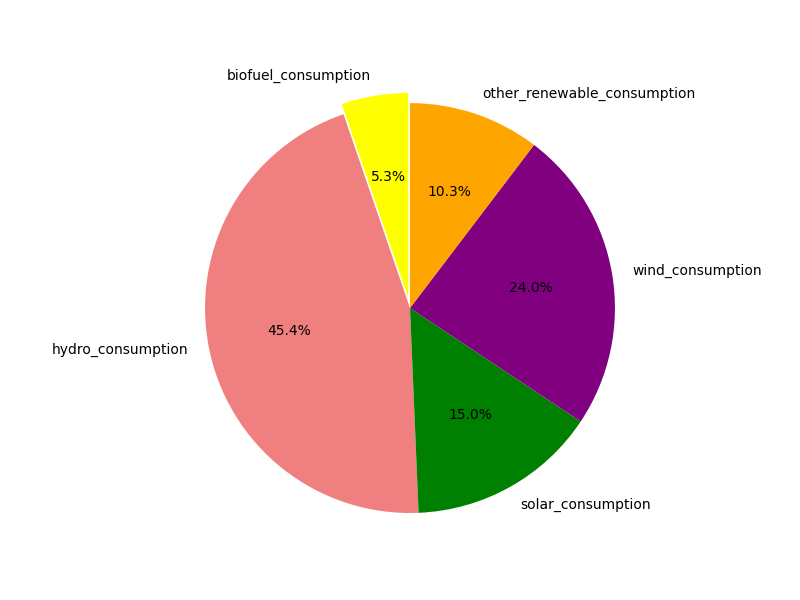

In [25]:
#VISUAL (E)
#Create a pie graph for renewable energy consumption for 2022
filt_countries_world_energy['biofuel_consumption'] = pd.to_numeric(filt_countries_world_energy['biofuel_consumption'], errors='coerce')
filt_countries_world_energy['hydro_consumption'] = pd.to_numeric(filt_countries_world_energy['hydro_consumption'], errors='coerce')
filt_countries_world_energy['solar_consumption'] = pd.to_numeric(filt_countries_world_energy['solar_consumption'], errors='coerce')
filt_countries_world_energy['wind_consumption'] = pd.to_numeric(filt_countries_world_energy['wind_consumption'], errors='coerce')
filt_countries_world_energy['other_renewable_consumption'] = pd.to_numeric(filt_countries_world_energy['other_renewable_consumption'], errors='coerce')

renewableenergy=filt_countries_world_energy[['biofuel_consumption', 'hydro_consumption', 
                                                     'solar_consumption', 'wind_consumption', 'other_renewable_consumption']].sum()

# Pie chart configuration
explode = (0.05, 0, 0, 0, 0)  # "explode" the first slice (biofuel)
colors = ["yellow", "lightcoral", "green", "purple", "orange"]

# Plot the pie chart
plt.figure(figsize=(8, 6))

plt.pie(renewableenergy, explode=explode, labels=renewableenergy.index, 
        colors=colors, autopct="%1.1f%%", startangle=90)

# Ensure the pie chart is circular
plt.axis("equal")  

#Save the plot
plt.savefig('Resources/e_renewable_energy.png')

# Show the plot
plt.show()

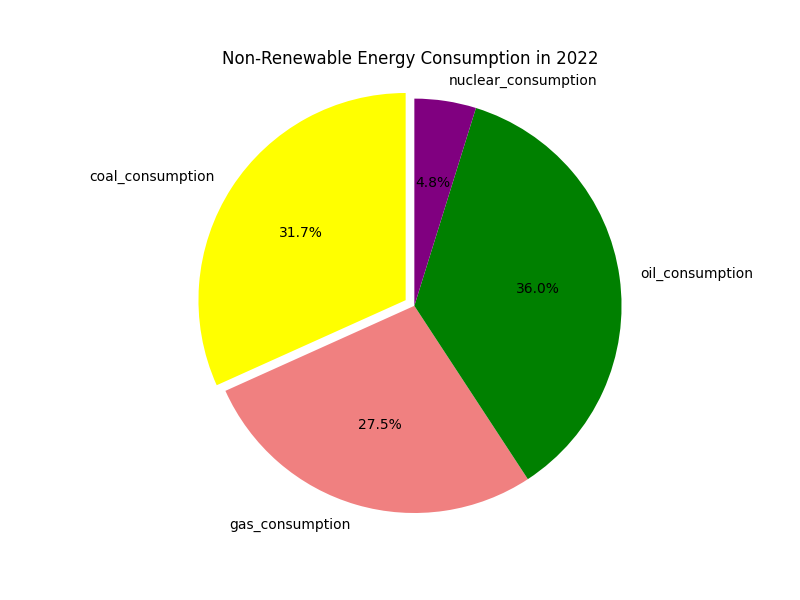

In [26]:
#VISUAL (E)
#Create a pie graph for non-renewable energy consumption categories for year 2022
nonrenewableenergy=filt_countries_world_energy[['coal_consumption', 'gas_consumption', 
                                                     'oil_consumption', 'nuclear_consumption']].sum()
# Pie chart configuration
explode = (0.05, 0, 0, 0)  # "explode" the first slice
colors = ["yellow", "lightcoral", "green", "purple"]

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.title("Non-Renewable Energy Consumption in 2022")
plt.pie(nonrenewableenergy, explode=explode, labels=nonrenewableenergy.index, 
        colors=colors, autopct="%1.1f%%", startangle=90)

# Ensure the pie chart is circular
plt.axis("equal")  

#Save the plot
plt.savefig('Resources/e_non-renewable-consumption.png')

# Show the plot
plt.show()

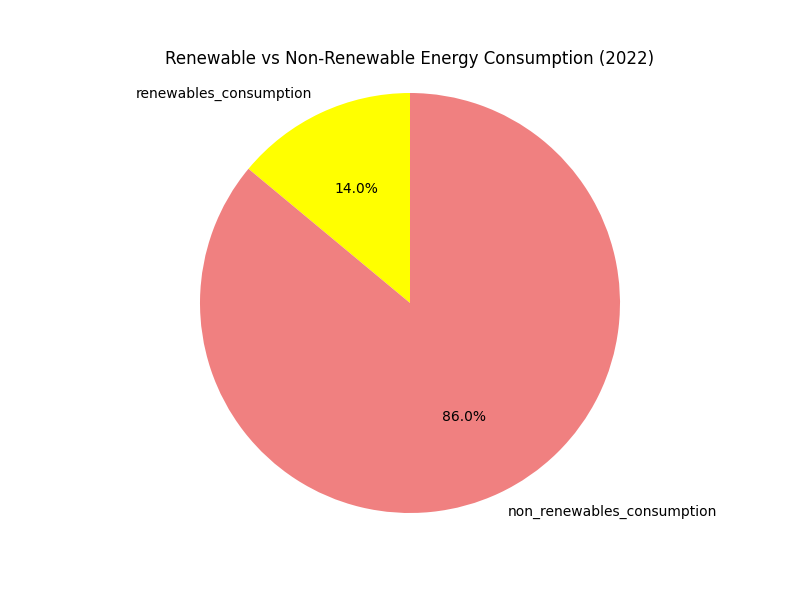

In [27]:
#VISUAL (E)
#Create a pie graph for renewable and non-renewable energy consumption for 2022 year

pie20182022=filt_countries_world_energy[['renewables_consumption', 'non_renewables_consumption']].sum()

# Pie chart configuration
explode = (0, 0)  
colors = ["yellow", "lightcoral"]

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.title("Renewable vs Non-Renewable Energy Consumption (2022)")

plt.pie(pie20182022, labels=pie20182022.index, 
        colors=colors, autopct="%1.1f%%", startangle=90)

# Ensure the pie chart is circular
plt.axis("equal")  

#Save the plot
plt.savefig('Resources/e_pie_both.png')

# Show the plot
plt.show()

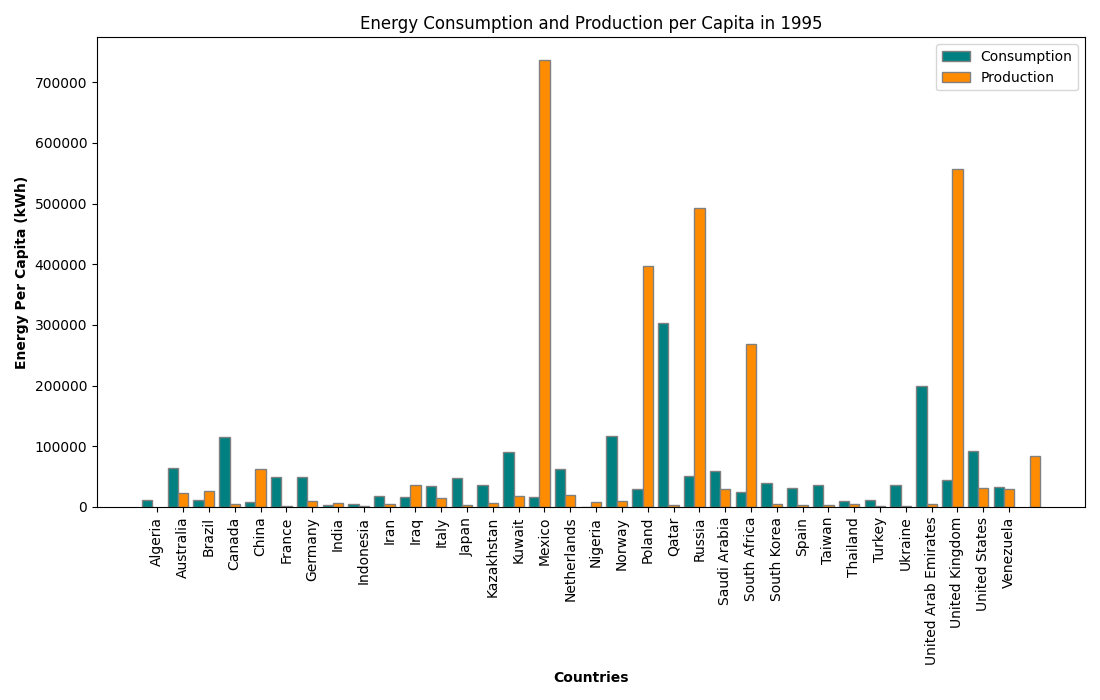

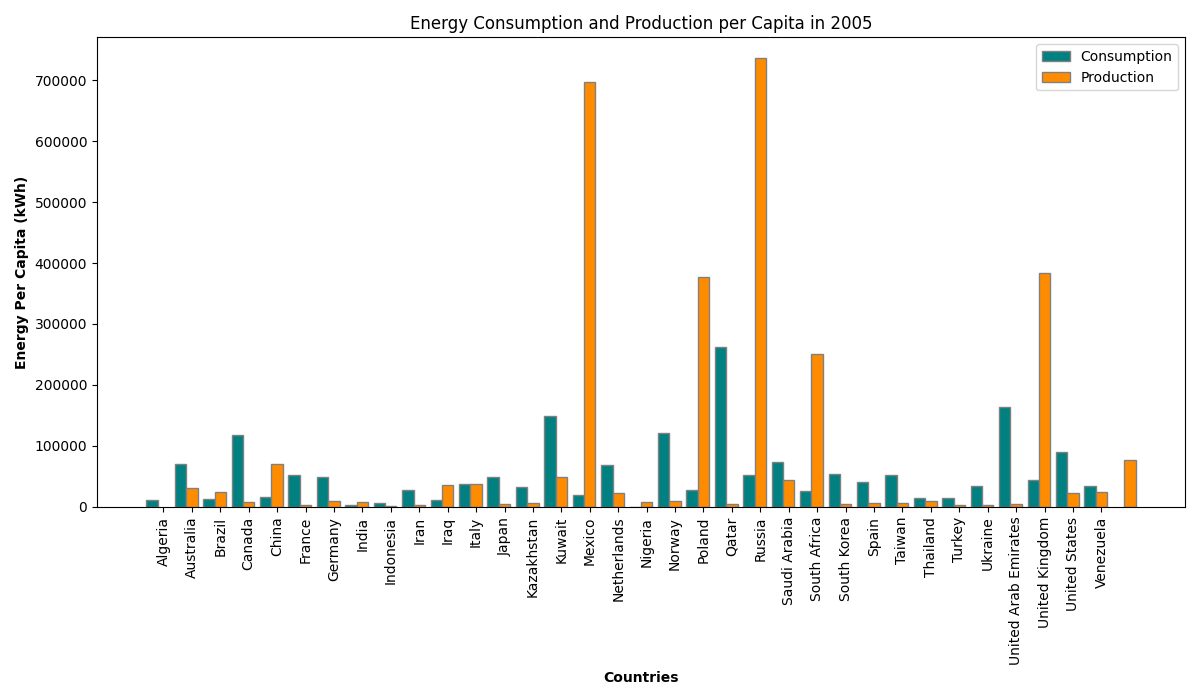

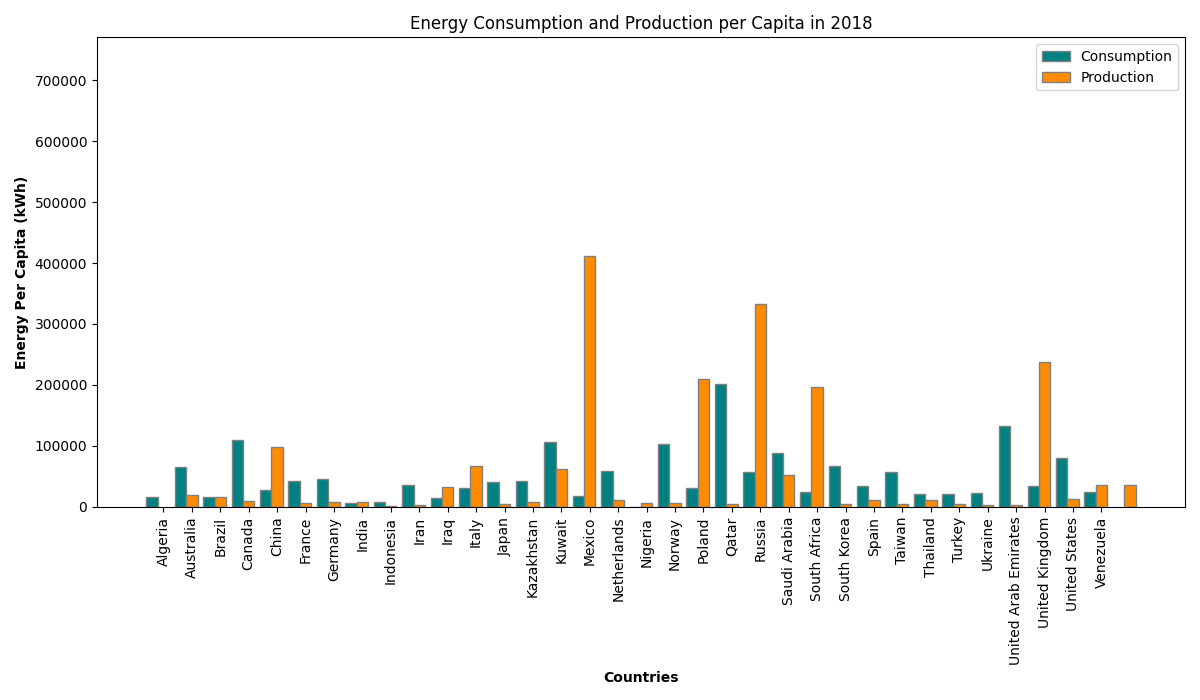

In [28]:
# VISUAL (Amy)
top_country_filtered=top_country_df.loc[top_country_df['year'] < 2019 ]


# Filter data for the specific year (1995)
year_to_plot = 1995
year_filtered_df = top_country_filtered[top_country_filtered['year'] == year_to_plot]

# Select relevant columns for consumption and production
filtered_df = year_filtered_df[['country', 'year', 'total_cons_per_capita', 'total_prod_per_capita']]

# Set the bar width and space between
bar_width = 0.4
gap = 1.0

# Set positions of bars on the X-axis
r1 = [x * gap for x in range(len(filtered_df))]  # Positions for consumption
r2 = [x + bar_width + gap for x in r1]  # Positions for production 

# Increase figure size to allow more space for labels
plt.figure(figsize=(11, 7))

# Create the bar chart
plt.bar(r1, filtered_df['total_cons_per_capita'], color='teal', width=bar_width, edgecolor='grey', label='Consumption')
plt.bar(r2, filtered_df['total_prod_per_capita'], color='darkorange', width=bar_width, edgecolor='grey', label='Production')

# Add labels and title
plt.xlabel('Countries', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(filtered_df))], filtered_df['country'], rotation = 90, ha = 'center')
plt.ylabel('Energy Per Capita (kWh)', fontweight='bold')
plt.title(f'Energy Consumption and Production per Capita in {year_to_plot}')

# Adjust layout to make room for longer labels
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

#Save the plot
plt.savefig('Resources/a_per_capita_countries1995.png')




# Filter data for the specific year (2005)
year_to_plot = 2005
year_filtered_df = top_country_filtered[top_country_filtered['year'] == year_to_plot]

# Select relevant columns for consumption and production
filtered_df = year_filtered_df[['country', 'year', 'total_cons_per_capita', 'total_prod_per_capita']]

# Set the bar width and space between
bar_width = 0.4
gap = 1.0

# Set positions of bars on the X-axis
r1 = [x * gap for x in range(len(filtered_df))]  # Positions for consumption
r2 = [x + bar_width + gap for x in r1]  # Positions for production 

# Increase figure size to allow more space for labels
plt.figure(figsize=(12, 7))

# Create the bar chart
plt.bar(r1, filtered_df['total_cons_per_capita'], color='teal', width=bar_width, edgecolor='grey', label='Consumption')
plt.bar(r2, filtered_df['total_prod_per_capita'], color='darkorange', width=bar_width, edgecolor='grey', label='Production')

# Add labels and title
plt.xlabel('Countries', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(filtered_df))], filtered_df['country'], rotation = 90, ha = 'center')
plt.ylabel('Energy Per Capita (kWh)', fontweight='bold')
plt.title(f'Energy Consumption and Production per Capita in {year_to_plot}')

# Adjust layout to make room for longer labels
plt.tight_layout()

# Adjust the y-axis limit to match the 1995 y axis for better comparison
plt.ylim(0, 700000 * 1.1)
plt.legend()

# Show the plot
plt.show()

#Save the plot
plt.savefig('Resources/a_per_capita_countries2005.png')



# Filter data for the specific year (2018)
year_to_plot = 2018
year_filtered_df = top_country_filtered[top_country_filtered['year'] == year_to_plot]

# Select relevant columns for consumption and production
filtered_df = year_filtered_df[['country', 'year', 'total_cons_per_capita', 'total_prod_per_capita']]

# Set the bar width and space between
bar_width = 0.4
gap = 1.0

# Set positions of bars on the X-axis
r1 = [x * gap for x in range(len(filtered_df))]  # Positions for consumption
r2 = [x + bar_width + gap for x in r1]  # Positions for production (shifted by bar_width)

# Increase figure size to allow more space for labels
plt.figure(figsize=(12, 7))

# Create the bar chart
plt.bar(r1, filtered_df['total_cons_per_capita'], color='teal', width=bar_width, edgecolor='grey', label='Consumption')
plt.bar(r2, filtered_df['total_prod_per_capita'], color='darkorange', width=bar_width, edgecolor='grey', label='Production')

# Add labels and title
plt.xlabel('Countries', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(filtered_df))], filtered_df['country'], rotation = 90, ha = 'center')
plt.ylabel('Energy Per Capita (kWh)', fontweight='bold')
plt.title(f'Energy Consumption and Production per Capita in {year_to_plot}')

# Adjust layout to make room for longer labels
plt.tight_layout()

# Adjust the y-axis limit to match the 1995 y axis for better comparison
plt.ylim(0, 700000 * 1.1)
plt.legend()

# Show the plot
plt.show()

#Save the plot
plt.savefig('Resources/a_per_capita_countries2018.png')


In [29]:
# Q1 (Amy) What is the relationship between energy production per capita and energy consumption per capita across countries?
# Statistical Analysis of per capita consumption and production

#T-TEST
# Drop any rows with NaN values in the relevant columns
top_country_filtered_cl = top_country_filtered.dropna(subset=['total_prod_per_capita', 'total_cons_per_capita'])

# Perform the t-test between total production per capita and total consumption per capita
t_statistic, p_value = stats.ttest_ind(
    top_country_filtered_cl['total_prod_per_capita'],
    top_country_filtered_cl['total_cons_per_capita'],
    equal_var=False
)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

                                                              
#ANOVA TEST consumption per capita
import warnings
warnings.filterwarnings('ignore')
# Extract individual groups decade
group0 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2008]['total_cons_per_capita']
group1 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2009]['total_cons_per_capita']
group2 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2010]['total_cons_per_capita']
group3 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2011]['total_cons_per_capita']
group4 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2012]['total_cons_per_capita']
group5 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2013]['total_cons_per_capita']
group6 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2014]['total_cons_per_capita']
group7 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2015]['total_cons_per_capita']
group8 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2016]['total_cons_per_capita']
group9 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2017]['total_cons_per_capita']
group10 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2018]['total_cons_per_capita']
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9,group10)





T-statistic: 5.296761358343689, p-value: 1.3704128715598114e-07


F_onewayResult(statistic=0.014319448497051985, pvalue=0.9999999844247471)

In [30]:
#ANOVA TEST production per capita
import warnings
warnings.filterwarnings('ignore')
# Extract individual groups decade
group0 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2008]['total_prod_per_capita']
group1 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2009]['total_prod_per_capita']
group2 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2010]['total_prod_per_capita']
group3 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2011]['total_prod_per_capita']
group4 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2012]['total_prod_per_capita']
group5 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2013]['total_prod_per_capita']
group6 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2014]['total_prod_per_capita']
group7 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2015]['total_prod_per_capita']
group8 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2016]['total_prod_per_capita']
group9 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2017]['total_prod_per_capita']
group10 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2018]['total_prod_per_capita']
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9,group10)

F_onewayResult(statistic=0.04569316056743195, pvalue=0.9999954920296542)

Correlation coefficient between energy production and energy consumption: 0.79
Linear regression equation: y = 0.25x + 31263.48
R-squared: 0.62
Correlation between per capita energy production and per capita energy consumption: 0.79


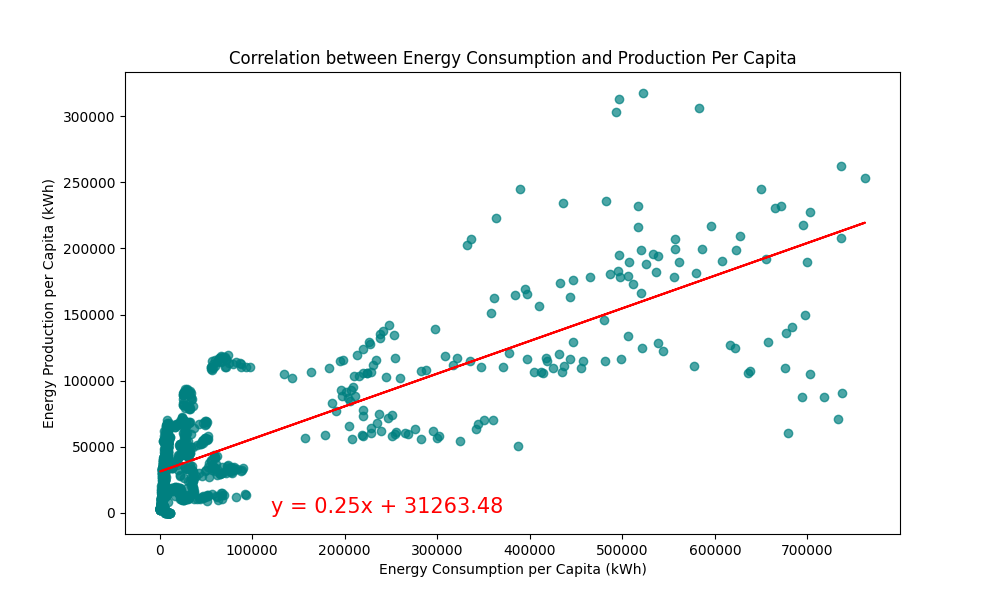

In [31]:
# Q1 (Amy)
# Scatter plot of energy production vs. energy consumption per capita
plt.figure(figsize=(10, 6))
plt.scatter(top_country_filtered['total_prod_per_capita'], top_country_filtered['total_cons_per_capita'], alpha=0.7, color='teal')

plt.title('Correlation between Energy Consumption and Production Per Capita')
plt.xlabel('Energy Consumption per Capita (kWh)')
plt.ylabel('Energy Production per Capita (kWh)') 

# Calculate the correlation coefficient
correlation = top_country_filtered['total_prod_per_capita'].corr(top_country_filtered['total_cons_per_capita'])
print(f"Correlation coefficient between energy production and energy consumption: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    top_country_filtered['total_prod_per_capita'], top_country_filtered['total_cons_per_capita']
)

# Display results
print(f"Linear regression equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")

plt.plot(top_country_filtered['total_prod_per_capita'], slope * top_country_filtered['total_prod_per_capita'] + intercept, color='red')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(120000,250),fontsize=15,color="red")

# Calculate the Pearson correlation coefficient between energy production and consumption per capita
correlation = top_country_filtered[['total_cons_per_capita', 'total_prod_per_capita']].corr().iloc[0, 1]
print(f"Correlation between per capita energy production and per capita energy consumption: {correlation:.2f}")

# Save the plot
plt.savefig('Resources/a_per_capita_regression.png')


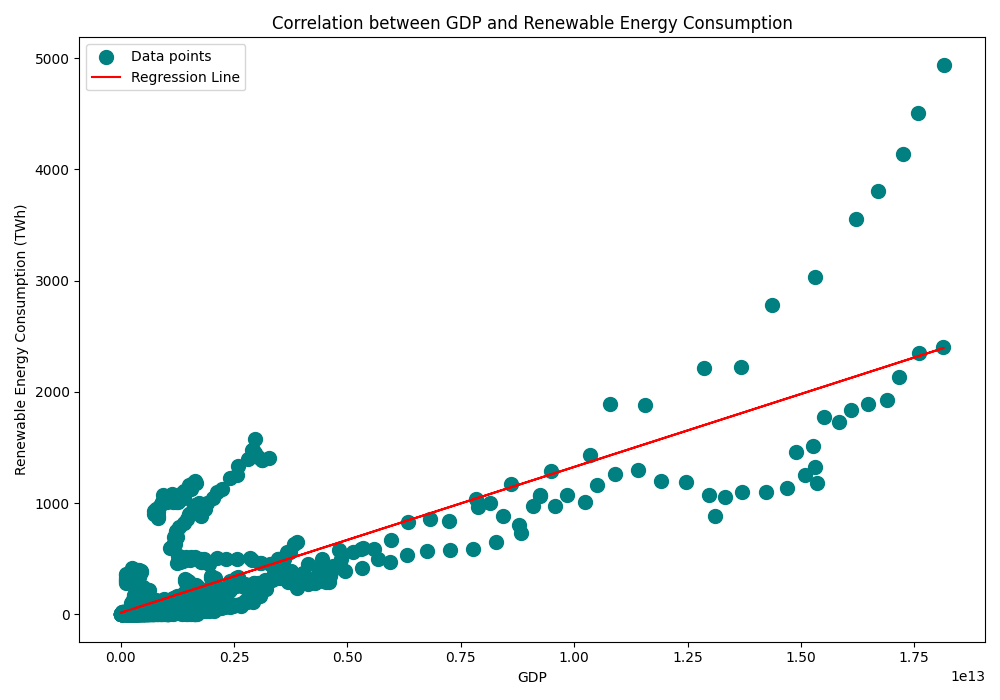

Correlation between GDP and renewable energy consumption: 0.79


In [32]:
#Q3 (Amy) Is there a correlation between renewable energy consumption and GDP growth?

# Plotting the scatter plot
plt.figure(figsize=(10, 7))

# Scatter plot of GDP vs renewable energy consumption
plt.scatter(top_country_filtered['gdp'], top_country_filtered['renewables_consumption'], c='teal', s=100, label='Data points')

# Add labels and title
plt.title('Correlation between GDP and Renewable Energy Consumption')
plt.xlabel('GDP')
plt.ylabel('Renewable Energy Consumption (TWh)')

# linear regression line 
try:
    slope, intercept = np.polyfit(top_country_filtered['gdp'], top_country_filtered['renewables_consumption'], 1)
    plt.plot(top_country_filtered['gdp'], slope * top_country_filtered['gdp'] + intercept, color='red', label='Regression Line')
except Exception as e:
    print(f"Error fitting regression line: {e}")

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Save plot
plt.savefig('Resources/a_gdp_renewables_regression.png')

# Calculate the Pearson correlation coefficient between % change in GDP and renewable energy consumption
correlation = top_country_filtered[['gdp', 'renewables_consumption']].corr().iloc[0, 1]
print(f"Correlation between GDP and renewable energy consumption: {correlation:.2f}")

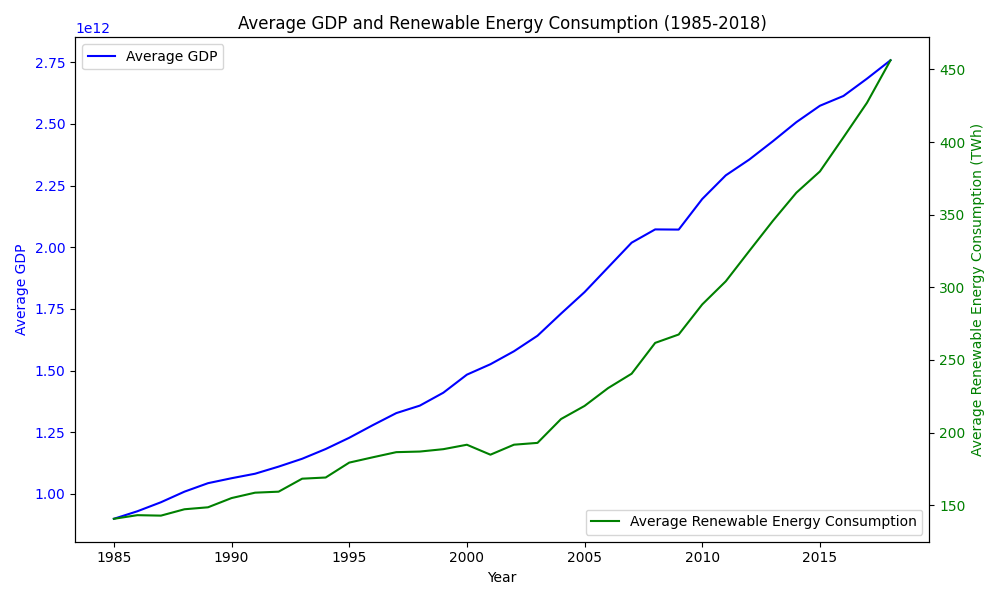

In [33]:
#Q3 (Amy)

# Calculate the average GDP and average renewable energy consumption for all countries combined, by year
avg_gdp = top_country_filtered.groupby('year')['gdp'].mean().reset_index()
avg_renewables_consumption = top_country_filtered.groupby('year')['renewables_consumption'].mean().reset_index()

# subplot with two axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the average GDP on the left y-axis
ax1.plot(avg_gdp['year'], avg_gdp['gdp'], label='Average GDP', linestyle='-', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average GDP', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Average GDP and Renewable Energy Consumption (1985-2018)')

# Create a second axis for renewable energy consumption
ax2 = ax1.twinx()  # Instantiate second axis
ax2.plot(avg_renewables_consumption['year'], avg_renewables_consumption['renewables_consumption'], label='Average Renewable Energy Consumption', linestyle='-', color='g')
ax2.set_ylabel('Average Renewable Energy Consumption (TWh)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig('Resources/a_avg_gdp_rens_line.png')

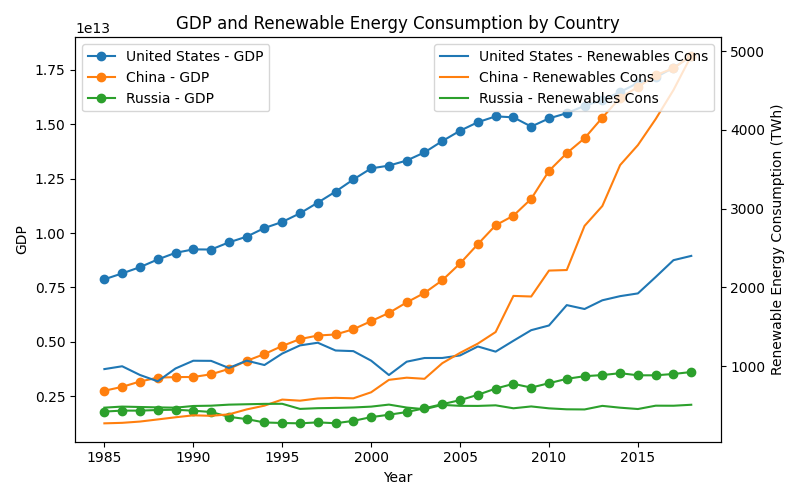

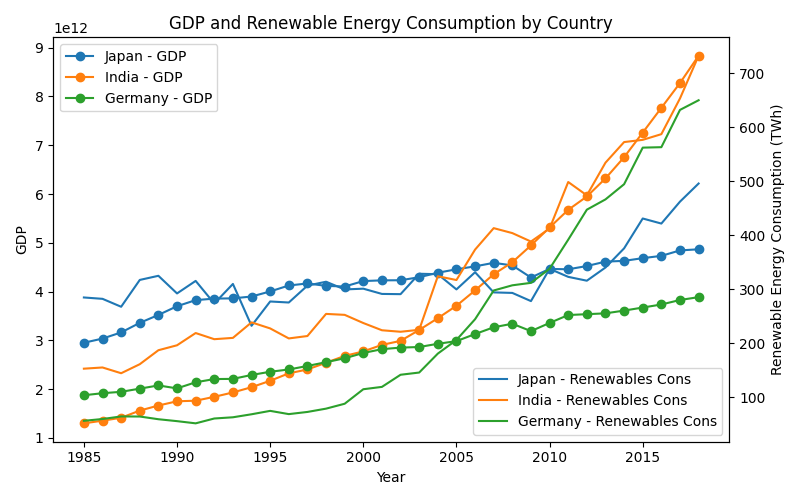

In [34]:
#Q3 (Amy) Plotting top 6 countries by GDB and renewable energy comsumption


countries_to_plot = ['United States', 'China', 'Russia']
countries_to_plot_2 = ['Japan', 'India', 'Germany']



# Create a subplot with two axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plotting GDP on the left y-axis
for country in countries_to_plot:
    country_data = top_country_filtered[top_country_filtered['country'] == country]
    ax1.plot(country_data['year'], country_data['gdp'], label=f'{country} - GDP', linestyle='-', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP and Renewable Energy Consumption by Country')
ax1.legend(loc='best')

# Create a second axis for renewable consumption
ax2 = ax1.twinx()  # second axis
for country in countries_to_plot:
    country_data = top_country_filtered[top_country_filtered['country'] == country]
    ax2.plot(country_data['year'], country_data['renewables_consumption'], label=f'{country} - Renewables Cons', linestyle='-')
ax2.set_ylabel('Renewable Energy Consumption (TWh)')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig('Resources/a_gdp_rens_countries1.png')



# Create a subplot with two axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plotting GDP on the left y-axis
for country in countries_to_plot_2:
    country_data = top_country_filtered[top_country_filtered['country'] == country]
    ax1.plot(country_data['year'], country_data['gdp'], label = f'{country} - GDP', linestyle='-', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP and Renewable Energy Consumption by Country')
ax1.legend(loc='best')

# Create a second axis for renewable consumption
ax2 = ax1.twinx()  # second axis
for country in countries_to_plot_2:
    country_data = top_country_filtered[top_country_filtered['country'] == country]
    ax2.plot(country_data['year'], country_data['renewables_consumption'], label=f'{country} - Renewables Cons', linestyle='-')
ax2.set_ylabel('Renewable Energy Consumption (TWh)')
ax2.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig('Resources/a_gdp_rens_countries2.png')

In [35]:
# Statistical Analysis of GDP and Renewables Consumption

#T-TEST

# Drop any rows with NaN values in the relevant columns
top_country_filtered_cl = top_country_filtered.dropna(subset=['gdp', 'renewables_consumption'])

# Perform the t-test between total production per capita and total consumption per capita
t_statistic, p_value = stats.ttest_ind(
    top_country_filtered_cl['gdp'],
    top_country_filtered_cl['renewables_consumption'],
    equal_var=False
)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")


#ANOVA TEST for renewables consumption
import warnings
warnings.filterwarnings('ignore')

# Extract individual groups decade
group0 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2008]['renewables_consumption']
group1 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2009]['renewables_consumption']
group2 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2010]['renewables_consumption']
group3 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2011]['renewables_consumption']
group4 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2012]['renewables_consumption']
group5 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2013]['renewables_consumption']
group6 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2014]['renewables_consumption']
group7 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2015]['renewables_consumption']
group8 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2016]['renewables_consumption']
group9 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2017]['renewables_consumption']
group10 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2018]['renewables_consumption']
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9,group10)



T-statistic: 20.76401788304955, p-value: 1.2461860989954291e-81


F_onewayResult(statistic=0.31264537493261196, pvalue=0.9777430943553933)

In [36]:
#ANOVA TEST GDP over a decade
import warnings
warnings.filterwarnings('ignore')

# Extract individual groups decade
group0 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2008]['gdp']
group1 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2009]['gdp']
group2 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2010]['gdp']
group3 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2011]['gdp']
group4 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2012]['gdp']
group5 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2013]['gdp']
group6 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2014]['gdp']
group7 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2015]['gdp']
group8 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2016]['gdp']
group9 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2017]['gdp']
group10 = top_country_filtered_cl[top_country_filtered_cl['year'] == 2018]['gdp']
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9,group10)

F_onewayResult(statistic=0.14436975081836945, pvalue=0.9990640510303093)

In [37]:
# Q4-1
# Plot using hvplot showing consumption and production graph by renewable and non-renewable energy
consumption_production_plot = cons_prod_df.hvplot.line(
    x='year', 
    y=['renewables_electricity', 'non_renewables_production', 'renewables_consumption', 'non_renewables_consumption'],
    color=['blue', 'orange', 'green', 'red'],  # Colors for each line
    legend='top_left',  # Position of the legend
    line_width=2,
    xlabel='Year', 
    ylabel='Total Energy',
    title='Total Energy Production and Consumption Over Years',
    height=400, 
    width=800
)

# Configure x-ticks every 5 years
consumption_production_plot = consumption_production_plot.opts(xticks=dict(values=cons_prod_df['year'][::5]))
#Save the plot
plt.savefig('Resources/e_energy_trends')
# Show the plot
consumption_production_plot

:NdOverlay   [Variable]
   :Curve   [year]   (value)

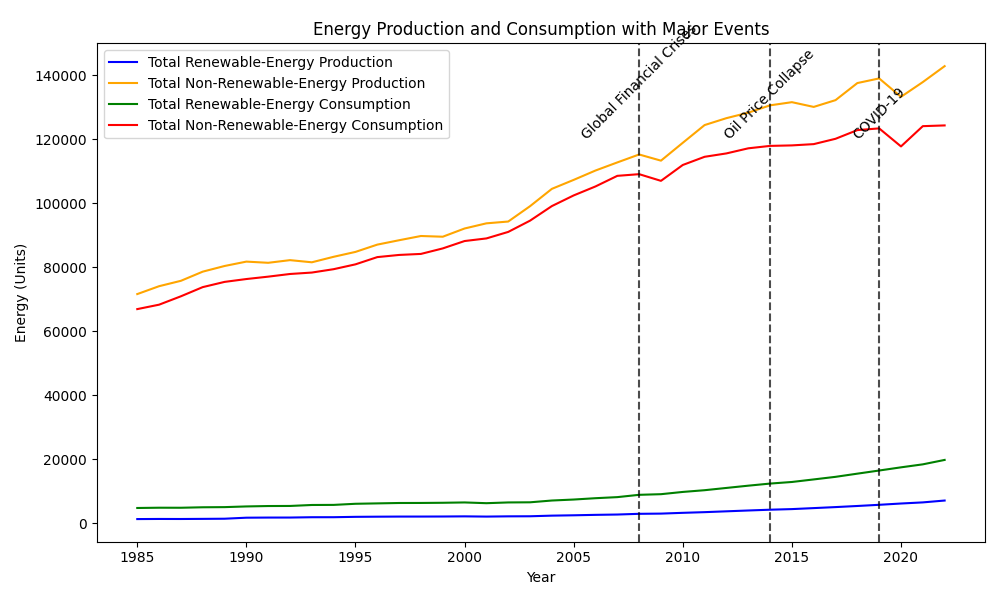

In [38]:
#Q4-2 What Are The Projected Renewable Energy Consumption Trends For The Next 50 Years?
# Plotting energy production and consumption values with the major events globally
plt.figure(figsize=(10, 6))
plt.plot(cons_prod_df['year'], cons_prod_df['renewables_electricity'], label='Total Renewable-Energy Production', color='blue')
plt.plot(cons_prod_df['year'], cons_prod_df['non_renewables_production'], label='Total Non-Renewable-Energy Production', color='orange')
plt.plot(cons_prod_df['year'], cons_prod_df['renewables_consumption'], label='Total Renewable-Energy Consumption', color='green')
plt.plot(cons_prod_df['year'], cons_prod_df['non_renewables_consumption'], label='Total Non-Renewable-Energy Consumption', color='red')


# Highlighting events
events = {2008: 'Global Financial Crises', 2014: 'Oil Price Collapse', 2019: 'COVID-19'}  
for year, event in events.items():
    plt.axvline(x=year, color='black', linestyle='--', alpha=0.7)
    plt.text(year, plt.ylim()[1]*0.8, event, rotation=45, color='black', ha='center')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Energy (Units)')
plt.title('Energy Production and Consumption with Major Events')

plt.legend(loc='upper left')

#Save the plot as image file
plt.savefig('Resources/e_majorevents')

# Show the plot 
plt.tight_layout() 
plt.show()

In [39]:
# Q4-3: Create events dataframe and merge with the main dataframe for our analysis
events = {
    2014: "Oil Price Collapse",
    2008: "Global Financial Crisis",
    2019: "COVID-19 Pandemic"
}
events_df = pd.DataFrame(list(events.items()), columns=['year', 'event'])

# Merge the dataframe with cons_prod_df
events_merge_df = cons_prod_df.merge(events_df[['year']], on='year', how='left')
events_merge_df['event_indicator'] = cons_prod_df['year'].isin(events_df['year']).astype(int)


# Create a new column for lagged event indicators
def create_lagged_event_indicator(events_merge_df, lag_years=2):
    """
    Creates lagged event indicators for up to `lag_years` after the event.
    For example, if an event occurred in 2014, it will flag the years 2015, 2016, etc.
    """
    for lag in range(1, lag_years + 1):
        events_merge_df[f'event_indicator_lag_{lag}'] = events_merge_df['event_indicator'].shift(+lag, fill_value=0)
    return events_merge_df

# Add lagged event indicators (for 1 and 2 years)
events_merge_df = create_lagged_event_indicator(events_merge_df, lag_years=2)

# Check the DataFrame
events_merge_df.head(10)


,year,Total Energy Production,Total Energy Consumption,renewables_electricity,non_renewables_production,renewables_consumption,non_renewables_consumption,event_indicator,event_indicator_lag_1,event_indicator_lag_2
0,1985,72973.110,71740.625,1316.031,71657.079,4782.385,66958.240,0,0,0
1,1986,75474.287,73210.032,1352.959,74121.328,4867.335,68342.697,0,0,0
2,1987,77146.396,75821.846,1339.826,75806.570,4856.408,70965.438,0,0,0
3,1988,80046.567,78837.623,1379.671,78666.896,5005.484,73832.139,0,0,0
4,1989,81862.590,80516.469,1427.082,80435.508,5051.645,75464.824,0,0,0
5,1990,83554.725,81627.818,1747.062,81807.663,5267.356,76360.462,0,0,0
6,1991,83223.349,82499.174,1787.315,81436.034,5393.757,77105.417,0,0,0
7,1992,84060.706,83355.137,1794.142,82266.564,5417.237,77937.900,0,0,0
8,1993,83488.757,84106.863,1894.041,81594.716,5721.247,78385.616,0,0,0
9,1994,85214.578,85189.359,1900.810,83313.768,5748.716,79440.643,0,0,0


In [40]:
#Q4-4 T-test with Lagged Years:
#Define event years and non-event years
event_years = events_merge_df[events_merge_df['event_indicator'] == 1]
non_event_years = events_merge_df[events_merge_df['event_indicator'] == 0]

#Define lagged years
lag_1_event_years = events_merge_df[events_merge_df['event_indicator_lag_1'] == 1]
lag_2_event_years = events_merge_df[events_merge_df['event_indicator_lag_2'] == 1]

# T-test for lag 1 years (Non-Renewable Energy Production)
t_stat_prod_lag_1, p_val_prod_lag_1 = st.ttest_ind(lag_1_event_years['non_renewables_production'], non_event_years['non_renewables_production'], equal_var=False)
print(f"T-test for Non-Renewable Energy Production (Lag 1) - T-statistic: {t_stat_prod_lag_1}, P-value: {p_val_prod_lag_1}")

# T-test for lag 2 years (Non-Renewable Energy Production)
t_stat_prod_lag_2, p_val_prod_lag_2 = st.ttest_ind(lag_2_event_years['non_renewables_production'], non_event_years['non_renewables_production'], equal_var=False)
print(f"T-test for Non-Renewable Energy Production (Lag 2) - T-statistic: {t_stat_prod_lag_2}, P-value: {p_val_prod_lag_2}")


# T-test for lag 1 years (Non-Renewable Energy Consumption)
t_stat_prod_lag_1, p_val_prod_lag_1 = st.ttest_ind(lag_1_event_years['non_renewables_consumption'], non_event_years['non_renewables_consumption'], equal_var=False)
print(f"T-test for Non-Renewable Energy Consumption (Lag 1) - T-statistic: {t_stat_prod_lag_1}, P-value: {p_val_prod_lag_1}")

# T-test for lag 2 years (Non-Renewable Energy Consumption)
t_stat_prod_lag_2, p_val_prod_lag_2 = st.ttest_ind(lag_2_event_years['non_renewables_consumption'], non_event_years['non_renewables_consumption'], equal_var=False)
print(f"T-test for Non-Renewable Energy Consumption (Lag 2) - T-statistic: {t_stat_prod_lag_2}, P-value: {p_val_prod_lag_2}")

T-test for Non-Renewable Energy Production (Lag 1) - T-statistic: 3.1241180821709786, P-value: 0.040859093361936195
T-test for Non-Renewable Energy Production (Lag 2) - T-statistic: 3.9083820967277076, P-value: 0.015549905755558825
T-test for Non-Renewable Energy Consumption (Lag 1) - T-statistic: 3.8321797646056814, P-value: 0.008706941590831553
T-test for Non-Renewable Energy Consumption (Lag 2) - T-statistic: 4.739320952917753, P-value: 0.002741416778504787


In [41]:
#Q4-5 Regression Analysis with Lagged Variables:
# Define the independent variable (lagged event indicators) and dependent variable (energy production or consumption)
X_prod = events_merge_df[['event_indicator', 'event_indicator_lag_1', 'event_indicator_lag_2']]
y_prod = events_merge_df['non_renewables_production']

X_cons = events_merge_df[['event_indicator', 'event_indicator_lag_1', 'event_indicator_lag_2']]
y_cons = events_merge_df['non_renewables_consumption']

# Add constant (intercept) to the independent variable
X_prod = sm.add_constant(X_prod)
X_cons = sm.add_constant(X_cons)

# Fit the regression model for production
model_prod = sm.OLS(y_prod, X_prod).fit()

# Fit the regression model for consumption
model_cons = sm.OLS(y_cons, X_cons).fit()

# Print the regression results
print("Regression results for Non-Renewable Energy Production:")
print(model_prod.summary())

print("Regression results for Non-Renewable Energy Consumption:")
print(model_cons.summary())

Regression results for Non-Renewable Energy Production:
                                OLS Regression Results                               
Dep. Variable:     non_renewables_production   R-squared:                       0.327
Model:                                   OLS   Adj. R-squared:                  0.268
Method:                        Least Squares   F-statistic:                     5.510
Date:                       Thu, 14 Nov 2024   Prob (F-statistic):            0.00341
Time:                               05:24:22   Log-Likelihood:                -426.87
No. Observations:                         38   AIC:                             861.7
Df Residuals:                             34   BIC:                             868.3
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0

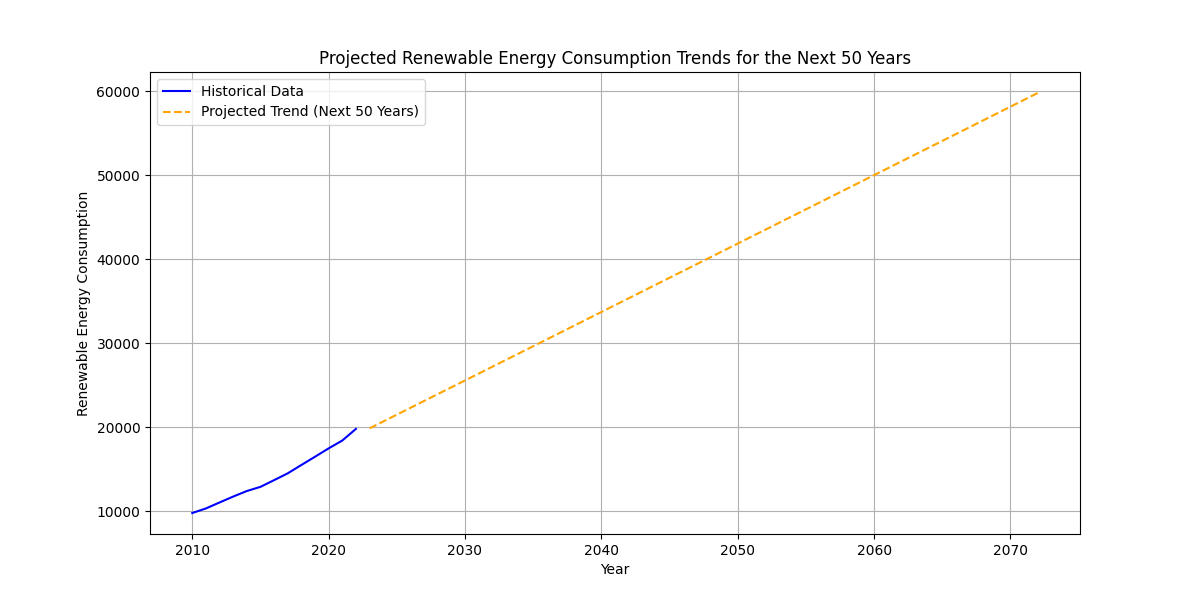

In [42]:
#Q5 (E) What are the projected renewable energy consumption trends for the next 50 years based on current data?
#Create linear regression model to build a projection for the next 50 years values
# Ensure 'year' and 'renewable_energy_consumption' are numeric
cons_prod_df['year'] = pd.to_numeric(cons_prod_df['year'], errors='coerce')
cons_prod_df['renewables_consumption'] = pd.to_numeric(cons_prod_df['renewables_consumption'], errors='coerce')

# Drop any rows with NaN values in the relevant columns
cons_prod_df = cons_prod_df.dropna(subset=['year', 'renewables_consumption'])

cons_prod_df = cons_prod_df.loc[(cons_prod_df['year'] >= 2010)]
# Fit a linear regression model to the data
slope, intercept, r_value, p_value, std_err = linregress(cons_prod_df['year'], cons_prod_df['renewables_consumption'])

# Define the range of years for the next 50 years
future_years = np.arange(cons_prod_df['year'].max() + 1, cons_prod_df['year'].max() + 51)

# Calculate projected renewable energy consumption
projected_consumption = slope * future_years + intercept

# Plot the historical data and the projection
plt.figure(figsize=(12, 6))
plt.plot(cons_prod_df['year'], cons_prod_df['renewables_consumption'], label='Historical Data', color='blue')
plt.plot(future_years, projected_consumption, label='Projected Trend (Next 50 Years)', color='orange', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Consumption')
plt.title('Projected Renewable Energy Consumption Trends for the Next 50 Years')
plt.legend()
plt.grid(True)
#Save the plot
plt.savefig("Resources/e_projected_ren-energy_cons.png")

plt.show()


In [43]:
#Q5 (E) Created the dataframe for renewable energy projection for the next 50 years
# Create a DataFrame with the projected years and renewable energy consumption
projected_df = pd.DataFrame({
    'year': future_years,
    'projected_renewables_consumption': projected_consumption
})

# Export the DataFrame to a CSV file
projected_df.to_csv("Resources/projected_renewable_energy_consumption.csv", index=False)

# Display the first few rows of the DataFrame for verification
projected_df.tail()

,year,projected_renewables_consumption
45,2068,56530.414747
46,2069,57344.984560
47,2070,58159.554374
48,2071,58974.124187
49,2072,59788.694000


In [44]:
#Q5 (E)
#Find the percentage change in year 2072 and 2022 (last reported data)
# Define the years for calculation

year_2072 = 2072

# Calculate projected consumption for 2072 and 2020 using the linear regression model
consumption_2022 = cons_prod_df.loc[cons_prod_df['year'] == 2022, 'renewables_consumption'].values
consumption_2072 = slope * year_2072 + intercept

# Calculate the percentage change
percentage_change = ((consumption_2072 - consumption_2022) / consumption_2022) * 100

# Display the result
print(f"Projected percentage change in renewable energy consumption in 2072: {round(float(percentage_change),2)}%")


Projected percentage change in renewable energy consumption in 2072: 201.83%


In [45]:
#Q5 (E) Find projected values for non-renewables energy consumption

# Ensure 'non-renewable_energy_consumption' are numeric

cons_prod_df['non_renewables_consumption'] = pd.to_numeric(cons_prod_df['non_renewables_consumption'], errors='coerce')

# Drop any rows with NaN values in the relevant columns
cons_prod_df = cons_prod_df.dropna(subset=['year', 'non_renewables_consumption'])

cons_prod_df=cons_prod_df.loc[(cons_prod_df['year'] >= 2010 )]
# Fit a linear regression model to the data
slope, intercept, r_value, p_value, std_err = linregress(cons_prod_df['year'], cons_prod_df['non_renewables_consumption'])

# Define the range of years for the next 50 years
future_years_nonrenw = np.arange(cons_prod_df['year'].max() + 1, cons_prod_df['year'].max() + 51)

# Calculate projected renewable energy consumption
projected_consumption_nonrenw = slope * future_years_nonrenw + intercept

# Create a DataFrame with the projected years and non-renewable energy consumption
projected_nonrenewable_df = pd.DataFrame({
    'year': future_years_nonrenw,
    'projected_consumption_nonrenw': projected_consumption_nonrenw
})


# Display the first few rows of the DataFrame for verification
projected_nonrenewable_df.tail()


,year,projected_consumption_nonrenw
45,2068,165135.608066
46,2069,166022.764203
47,2070,166909.920341
48,2071,167797.076478
49,2072,168684.232615


In [46]:
projected_future_df=pd.merge(projected_df, projected_nonrenewable_df, on='year', how='left')
filt_projected_future_df=projected_future_df[projected_future_df['year'] == 2072]
filt_projected_future_df

,year,projected_renewables_consumption,projected_consumption_nonrenw
49,2072,59788.694,168684.232615


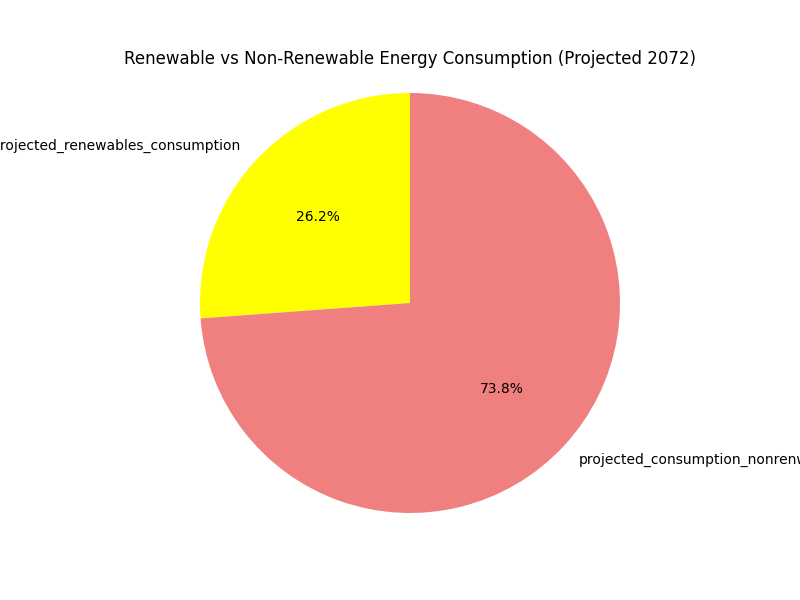

In [47]:
#Pie chart distribution for renewables vs non-renewables

filt_projected_future_df['projected_renewables_consumption'] = pd.to_numeric(filt_projected_future_df['projected_renewables_consumption'], errors='coerce')
filt_projected_future_df['projected_consumption_nonrenw'] = pd.to_numeric(filt_projected_future_df['projected_consumption_nonrenw'], errors='coerce')

# Extract the relevant columns for the pie chart
projected2072 = filt_projected_future_df[['projected_renewables_consumption', 'projected_consumption_nonrenw']]


# If the DataFrame is not empty, sum the values of each column
total_consumption = projected2072.sum()

# Pie chart configuration
explode = (0, 0)  # No slice exploded
colors = ["yellow", "lightcoral"]  # Colors for renewable and non-renewable slices

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.title("Renewable vs Non-Renewable Energy Consumption (Projected 2072)")

# Use the summed values for the pie chart
plt.pie(total_consumption, labels=total_consumption.index, 
        colors=colors, autopct="%1.1f%%", startangle=90)

# Ensure the pie chart is circular
plt.axis("equal")  
#Save the plot
plt.savefig('Resources/e_projected_energy.png')

# Show the plot
plt.show()

In [48]:
six_continents = world_energy_df.loc[
    (
        (world_energy_df["country"] == "Asia") |
        (world_energy_df["country"] == "Africa") |
        (world_energy_df["country"] == "Australia") |
        (world_energy_df["country"] == "Europe") |
        (world_energy_df["country"] == "North America") |
        (world_energy_df["country"] == "South America")
    ) & (world_energy_df["year"] >= 1985)  
]
six_continents

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
230,Africa,1985,0,555652995.0,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,3.181,24.268,1416.650,787.166,251.082,139.514,6.244,70.458,2157.661,1198.911,53.869,35.212,0.00,258.986,11.585,4.060,87.218,4023.186,0.0,3.417,68.496,363.062,201.736,3731.344,2073.333,77.895,92.746,7.287,18.940,278.843,50.259,27.927,501.829,10.253,47.027,910.061,505.678,10.783,12.473,0.00,11.148,14.666,146.222,88.994,49.450,263.154,19.094,6.541,13.124,18.722,162.162,99.043,55.034,291.841,21.250,7.254,0.00,0.000,35.414,3.944,15.081,9.565,5.315,27.142,2.052,0.675,2.575,25.288,1007.324,61.721,34.296,1812.865,3.970,114.552,5399.649,3000.331,13.242,45.060,0.859,0.269,0.00,14.957,0.112,0.484,0.000,1.545,0.104,0.000,0.038,466.093,2235.495,11.168,14.778,147.081,89.478,49.719,264.699,19.197,6.579,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2088.414,2235.495,4911.972,4961.691,5710.555,5800.033,3758.486,4023.185
231,Africa,1986,0,571646786.0,0.0,0.000,0.000,0.000,0.0

In [49]:
six_continents=six_continents.rename(columns={'country': 'continent'})
six_continents

,continent,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
230,Africa,1985,0,555652995.0,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,3.181,24.268,1416.650,787.166,251.082,139.514,6.244,70.458,2157.661,1198.911,53.869,35.212,0.00,258.986,11.585,4.060,87.218,4023.186,0.0,3.417,68.496,363.062,201.736,3731.344,2073.333,77.895,92.746,7.287,18.940,278.843,50.259,27.927,501.829,10.253,47.027,910.061,505.678,10.783,12.473,0.00,11.148,14.666,146.222,88.994,49.450,263.154,19.094,6.541,13.124,18.722,162.162,99.043,55.034,291.841,21.250,7.254,0.00,0.000,35.414,3.944,15.081,9.565,5.315,27.142,2.052,0.675,2.575,25.288,1007.324,61.721,34.296,1812.865,3.970,114.552,5399.649,3000.331,13.242,45.060,0.859,0.269,0.00,14.957,0.112,0.484,0.000,1.545,0.104,0.000,0.038,466.093,2235.495,11.168,14.778,147.081,89.478,49.719,264.699,19.197,6.579,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2088.414,2235.495,4911.972,4961.691,5710.555,5800.033,3758.486,4023.185
231,Africa,1986,0,571646786.0,0.0,0.000,0.000,0.000,0

In [50]:
#VISUAL (SEZER)
# Plot energy consumption over time by continent
consumption_plot_1a = six_continents.hvplot.line(
    x='year', y='total_cons_per_capita', by='continent', 
    title="Total Energy Consumption Per Capita Over Time by Continent",
    xlabel='Year', ylabel='Total Energy Consumption ',
    line_width=2, height=400, width=1000
)
consumption_plot_1a

:NdOverlay   [continent]
   :Curve   [year]   (total_cons_per_capita)

In [51]:
import panel as pn

# Enable panel extensions
pn.extension()

# Save hvplot as PNG
pn.panel(consumption_plot_1a).save("consumption_plot_1a.png", embed=True)


In [52]:
#VISUAL (SEZER)
# Plot energy production over time by continent
Production_plot_1b = six_continents.hvplot.line(
    x='year', y='total_prod_per_capita', by='continent', 
    title="Total Energy Production Per Capita Over Time by Continent",
    xlabel='Year', ylabel='Total Energy Production',
    line_width=2, height=400, width=1000
)
Production_plot_1b

:NdOverlay   [continent]
   :Curve   [year]   (total_prod_per_capita)

In [53]:
# Calculate the Pearson correlation between total energy consumption per capita and total energy production per capita
correlation_value = six_continents['total_cons_per_capita'].corr(six_continents['total_prod_per_capita'])
print(f"Correlation between total energy consumption per capita and total energy production per capita: {correlation_value}")


Correlation between total energy consumption per capita and total energy production per capita: 0.9294352556530329


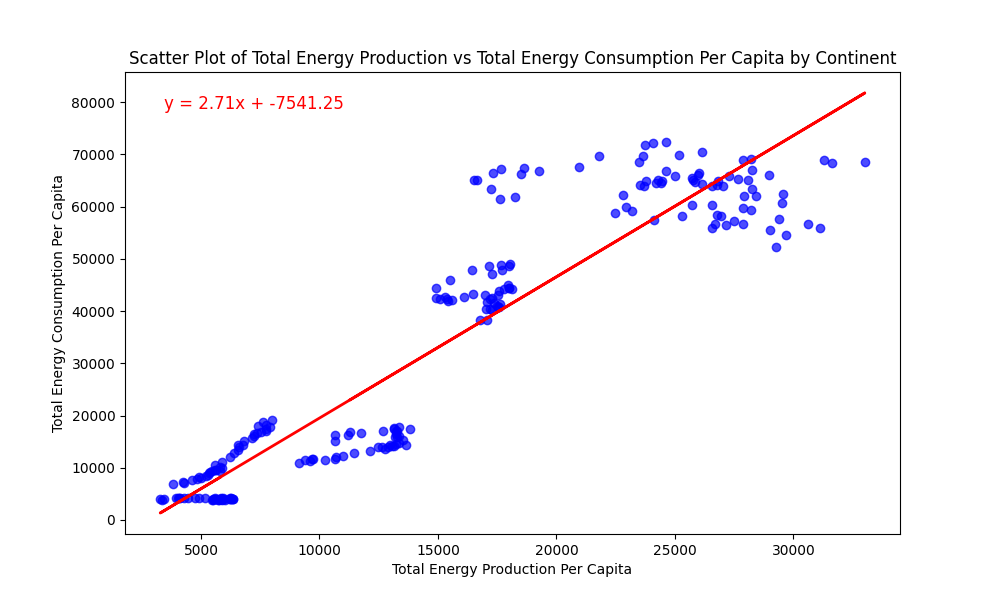

2.7050568753723883 -7541.248026596724 0.9294352556530329 7.941793536304556e-100 0.07143516137788589


In [54]:
# Perform linear regression to get the line equation
slope, intercept, r_value, p_value, std_err = linregress(
    six_continents['total_prod_per_capita'], six_continents['total_cons_per_capita']
)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(six_continents['total_prod_per_capita'], six_continents['total_cons_per_capita'], alpha=0.7, color='blue')
plt.plot(six_continents['total_prod_per_capita'], slope * six_continents['total_prod_per_capita'] + intercept, color='red', linewidth=2)

# Add labels and title
plt.title("Scatter Plot of Total Energy Production vs Total Energy Consumption Per Capita by Continent")
plt.xlabel("Total Energy Production Per Capita")
plt.ylabel("Total Energy Consumption Per Capita")

# Display the line equation on the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(0.05, 0.95, line_eq, transform=plt.gca().transAxes, color="red", fontsize=12, verticalalignment="top")

# Show plot
plt.show()

print(slope, intercept, r_value, p_value, std_err) 


In [55]:
plt.savefig("Resources/Scatter Plot of Total Energy Production vs Consumption Per Capita by Continent.png", format="png")

In [56]:
import panel as pn

# Enable panel extensions
pn.extension()

# Save hvplot as PNG
pn.panel(Production_plot_1b).save("Resources/production_plot_1b.png", embed=True)


In [57]:
#Define dataframes to show renewable energy and non-renewable energy for 6 continents
renewable_energy_df=six_continents.loc[:,["continent", "year","renewables_consumption"]]

non_renewable_energy_df=six_continents.loc[:,["continent", "year","non_renewables_consumption" ]]



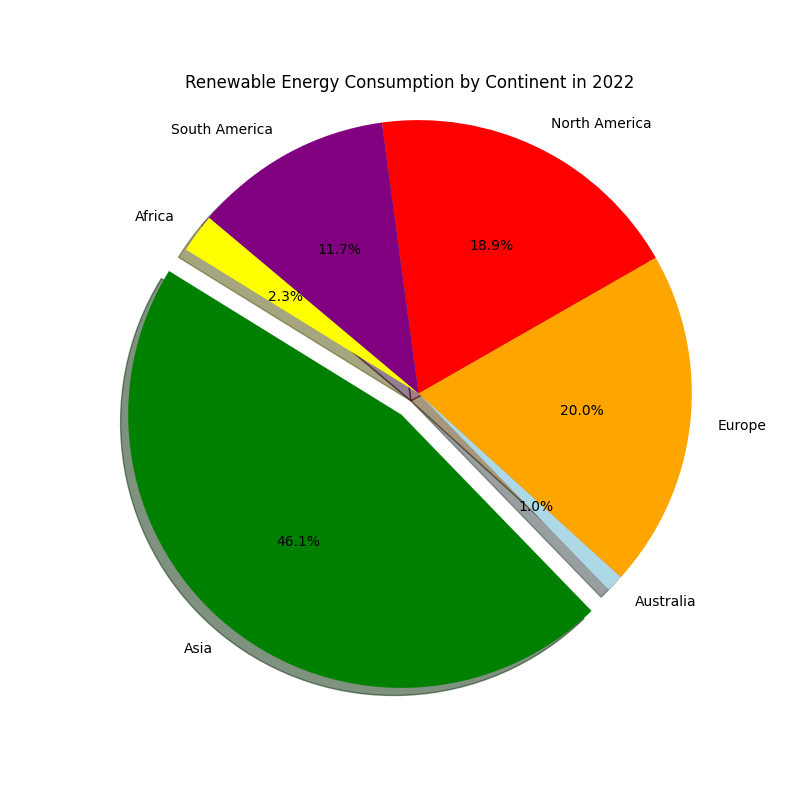

In [58]:
#Pie chart showing renewable energy consumption in 2022 per continent
renewable_2022 = renewable_energy_df[renewable_energy_df['year'] == 2022]
non_renewable_2022 = non_renewable_energy_df[non_renewable_energy_df['year'] == 2022]

# Define color palettes for renewable and non-renewable pie charts
colors=["yellow","green","lightblue","orange","red","purple"]
explode=(0,0.1,0,0,0,0)
plt.figure(figsize=(8, 8))
plt.pie(
    renewable_2022['renewables_consumption'], 
    labels=renewable_2022['continent'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=explode,
    shadow=True,
    
)
plt.axis("equal")
plt.title("Renewable Energy Consumption by Continent in 2022")
plt.show()

In [59]:
plt.savefig("Resources/pie_renewable_energy_consumption_2022.png", format="png")

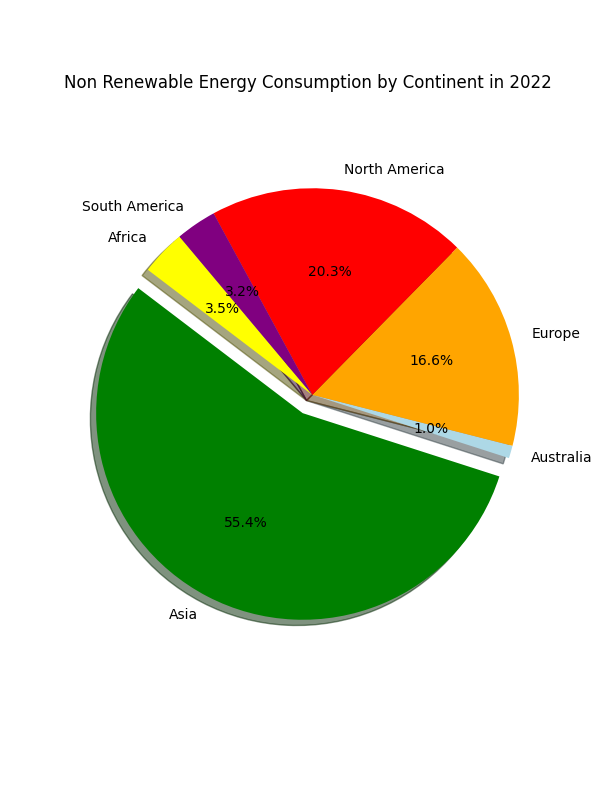

In [ ]:
colors=["yellow","green","lightblue","orange","red","purple"]
explode=(0,0.1,0,0,0,0)
plt.figure(figsize=(6, 8))
plt.pie(
    non_renewable_2022['non_renewables_consumption'], 
    labels=renewable_2022['continent'], 
    autopct='%1.1f%%', 
    startangle=130, 
    colors=colors,
    explode=explode,
    shadow=True,
    
)
plt.axis("equal")
plt.title("Non Renewable Energy Consumption by Continent in 2022")
plt.show()



In [ ]:
plt.savefig("Resources/pie_non_renewable_energy_consumption_2022.png", format="png")

In [61]:
# Filter data for the year 2022
year_2022_data = six_continents[six_continents['year'] == 2022]

In [62]:
#VISUAL (Sezer)
# Renewables vs non-renewables energy consumption per continent
energy_mix_plot = year_2022_data.hvplot.bar(
    x='continent', y=['renewables_consumption', 'non_renewables_consumption'], 
    stacked=True, title="Energy Mix by Continent in 2022",
    xlabel='Continent', ylabel='Energy Source Contribution',
    height=400, width=800
)
energy_mix_plot

:Bars   [continent,Variable]   (value)

In [64]:
pn.panel(energy_mix_plot).save("Resources/energy_mix.png", embed=True)

In [65]:
# Q2 (Sezer) Is there a correlation between total energy consumption per capita and total energy 
#production per capita in different continents?

# Drop any rows with NaN values in the relevant columns

six_continents_cleaned = six_continents.dropna(subset=['total_prod_per_capita', 'total_cons_per_capita'])
# Perform the t-test between total production per capita and total consumption per capita
t_statistic, p_value = stats.ttest_ind(
    six_continents_cleaned['total_prod_per_capita'], 
    six_continents_cleaned['total_cons_per_capita'],
    equal_var=False
)

print(f"T-statistic: {t_statistic}, p-value: {p_value}")

T-statistic: -10.633693692517605, p-value: 2.0983809186947108e-22


In [66]:
# Q2 (Sezer) #ANOVA TEST 

# Suppress warnings
warnings.filterwarnings('ignore')

# Define the years you want to test
years = range(2012, 2023)

# Use a list comprehension to create each group for the specified years
groups = [six_continents[six_continents["year"] == year]["total_cons_per_capita"] for year in years]

# Perform the ANOVA test
anova_result = stats.f_oneway(*groups)
anova_result


F_onewayResult(statistic=0.0066544684672841525, pvalue=0.999999999535522)